In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model


# English To French

In [9]:
col=['sr','eng','sr1','french']
data=pd.read_csv("Datasets/Sentence pairs in English-French - 2023-10-27.tsv",names=col,header=None,sep='\t')
data=data.drop(['sr','sr1'],axis=1)
english_sentences=data['eng']
# print(english_sentences[100000])
french_sentences=data['french']
print(french_sentences[3922])
test_e=english_sentences[4000:6000]
test_f=french_sentences[4000:6000]
english_sentences=english_sentences[:4000]
french_sentences=french_sentences[:4000]


Nous descendrons à la banque et prendrons le A52.


In [10]:
en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(english_sentences)
en_sequences = en_tokenizer.texts_to_sequences(english_sentences)

fr_tokenizer = Tokenizer()
fr_tokenizer.fit_on_texts(french_sentences)
fr_sequences = fr_tokenizer.texts_to_sequences(french_sentences)

max_seq_length = max(max(len(en_seq), len(fr_seq)) for en_seq, fr_seq in zip(en_sequences, fr_sequences))
en_sequences = pad_sequences(en_sequences, maxlen=max_seq_length, padding='post')
fr_sequences = pad_sequences(fr_sequences, maxlen=max_seq_length, padding='post')

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=len(en_tokenizer.word_index) + 1, output_dim=128, input_length=max_seq_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(fr_tokenizer.word_index) + 1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(en_sequences, tf.one_hot(fr_sequences, len(fr_tokenizer.word_index) + 1), epochs=100,batch_size=120)
model.save("english_to_french.h5")
def translate_sentence(sentence):
    seq = en_tokenizer.texts_to_sequences([sentence])
    print(seq)
    seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
    translation = model.predict(seq)
    translation = np.argmax(translation, axis=-1)
    return ' '.join([fr_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])

input_sentence = "Let's try something"
output_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}\nTranslation: {output_sentence}")



Epoch 1/100
34/34 [==============================] - 15s 213ms/step - loss: 5.4320 - accuracy: 0.8669
Epoch 2/100
34/34 [==============================] - 7s 211ms/step - loss: 1.0023 - accuracy: 0.8940
Epoch 3/100
34/34 [==============================] - 5s 156ms/step - loss: 0.9517 - accuracy: 0.8940
Epoch 4/100
34/34 [==============================] - 5s 159ms/step - loss: 0.9320 - accuracy: 0.8941
Epoch 5/100
34/34 [==============================] - 6s 182ms/step - loss: 0.9096 - accuracy: 0.8940
Epoch 6/100
34/34 [==============================] - 5s 160ms/step - loss: 0.8508 - accuracy: 0.8941
Epoch 7/100
34/34 [==============================] - 5s 153ms/step - loss: 0.8003 - accuracy: 0.8941
Epoch 8/100
34/34 [==============================] - 6s 180ms/step - loss: 0.7673 - accuracy: 0.8955
Epoch 9/100
34/34 [==============================] - 4s 129ms/step - loss: 0.7461 - accuracy: 0.8967
Epoch 10/100
34/34 [==============================] - 7s 199ms/step - loss: 0.7299 - accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[[319, 277, 191]]
1/1 [==============================] - 0s 461ms/step
Input: Let's try something
Translation: discutons de chose 


In [ ]:
num_classes = len(fr_tokenizer.word_index) + 1

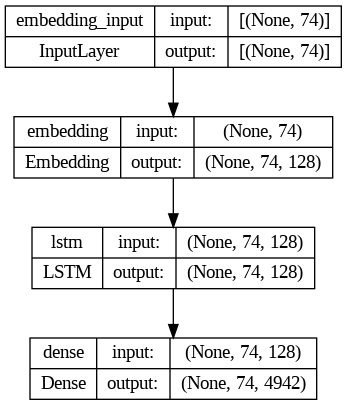

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True)


In [ ]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
loaded_model = load_model("Datasets/english_to_french.h5")

def translate_sentences(sentences):
    translations = []
    for sentence in sentences:
        seq = en_tokenizer.texts_to_sequences([sentence])
        seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
        translation = loaded_model.predict(seq)
        translation = np.argmax(translation, axis=-1)
        translated_sentence = ' '.join([fr_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])
        translations.append(translated_sentence)
    return translations

# input_sentences = ['During summer breaks, I ate dinner at midnight.',
# 'We must cut our expenses to save money.',
# "I don't know if I still have it.",
# 'Do you love music?',
# "Wherever you go, you'll be welcomed."
# ]
input_sentences=["I'll never forget the sight.'"]
output_sentences = translate_sentences(input_sentences)

for i, (input_sentence, output_sentence) in enumerate(zip(input_sentences, output_sentences)):
    print(f"Input {i + 1}: {input_sentence}\nTranslation: {output_sentence}")


1/1 [==============================] - 4s 4s/step
Input 1: I'll never forget the sight.'
Translation: je ne jamais le de


In [ ]:
en_ttokenizer = Tokenizer()
en_ttokenizer.fit_on_texts(test_e)
en_tsequences = en_ttokenizer.texts_to_sequences(test_e)

fr_ttokenizer = Tokenizer()
fr_ttokenizer.fit_on_texts(test_f)
fr_tsequences = fr_ttokenizer.texts_to_sequences(test_f)

#max_seq_length = max(max(len(en_seq), len(fr_seq)) for en_seq, fr_seq in zip(en_sequences, fr_sequences))
en_tsequences = pad_sequences(en_tsequences, maxlen=74, padding='post')
fr_tsequences = pad_sequences(fr_tsequences, maxlen=74, padding='post')

In [ ]:
test_loss, test_accuracy = loaded_model.evaluate(en_tsequences, tf.one_hot(fr_tsequences, num_classes), verbose=2)

print(f"Test accuracy: {test_accuracy}")

63/63 - 3s - loss: 1.1505 - accuracy: 0.8893 - 3s/epoch - 45ms/step
Test accuracy: 0.8893378376960754


# French To English

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(fr_tokenizer.word_index) + 1, output_dim=128, input_length=max_seq_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(en_tokenizer.word_index) + 1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(fr_sequences, tf.one_hot(en_sequences, len(en_tokenizer.word_index) + 1), epochs=100, batch_size=120)
model.save("french_to_english.h5")

def translate_sentence(sentence):
    seq = fr_tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
    translation = model.predict(seq)
    translation = np.argmax(translation, axis=-1)
    return ' '.join([en_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])

input_sentence = "Essayons quelque chose"
output_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}\nTranslation: {output_sentence}")


Epoch 1/100
34/34 [==============================] - 9s 196ms/step - loss: 4.8900 - accuracy: 0.8454
Epoch 2/100
34/34 [==============================] - 4s 123ms/step - loss: 0.8940 - accuracy: 0.8991
Epoch 3/100
34/34 [==============================] - 4s 104ms/step - loss: 0.8544 - accuracy: 0.8992
Epoch 4/100
34/34 [==============================] - 4s 129ms/step - loss: 0.8381 - accuracy: 0.8990
Epoch 5/100
34/34 [==============================] - 3s 92ms/step - loss: 0.8139 - accuracy: 0.8991
Epoch 6/100
34/34 [==============================] - 3s 96ms/step - loss: 0.7748 - accuracy: 0.8992
Epoch 7/100
34/34 [==============================] - 3s 91ms/step - loss: 0.7313 - accuracy: 0.8992
Epoch 8/100
34/34 [==============================] - 4s 123ms/step - loss: 0.7010 - accuracy: 0.8994
Epoch 9/100
34/34 [==============================] - 3s 93ms/step - loss: 0.6752 - accuracy: 0.9021
Epoch 10/100
34/34 [==============================] - 3s 86ms/step - loss: 0.6556 - accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 333ms/step
Input: Essayons quelque chose
Translation: let's try to me


In [ ]:
loaded_model = load_model("Models/french_to_english.h5")

def translate_sentences(sentences):
    translations = []
    for sentence in sentences:
        seq = fr_tokenizer.texts_to_sequences([sentence])
        seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
        translation = loaded_model.predict(seq)
        translation = np.argmax(translation, axis=-1)
        translated_sentence = ' '.join([en_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])
        translations.append(translated_sentence)
    return translations

# input_sentences = ['During summer breaks, I ate dinner at midnight.',
# 'We must cut our expenses to save money.',
# "I don't know if I still have it.",
# 'Do you love music?',
# "Wherever you go, you'll be welcomed."
# ]
input_sentences=["I'll never forget the sight.'"]
output_sentences = translate_sentences(input_sentences)

for i, (input_sentence, output_sentence) in enumerate(zip(input_sentences, output_sentences)):
    print(f"Input {i + 1}: {input_sentence}\nTranslation: {output_sentence}")


# English To German

In [8]:
col=['sr','eng','sr1','german']
data=pd.read_csv("Datasets/Sentence pairs in English-German - 2023-11-02.tsv",names=col,header=None,sep='\t')
data=data.drop(['sr','sr1'],axis=1)
english_sentences=data['eng']
# print(english_sentences)
german_sentences=data['german']
print(german_sentences[211])
test_e=english_sentences[4000:6000]
test_g=german_sentences[4000:6000]
english_sentences=english_sentences[:4000]
german_sentences=german_sentences[:4000]
print(data.shape)


Du kannst vermutlich erahnen, was indessen passiert.
(457615, 2)


In [11]:
en_tokenizer = Tokenizer()
en_tokenizer.fit_on_texts(english_sentences)
en_sequences = en_tokenizer.texts_to_sequences(english_sentences)

gr_tokenizer = Tokenizer()
gr_tokenizer.fit_on_texts(german_sentences)
gr_sequences = gr_tokenizer.texts_to_sequences(german_sentences)

max_seq_length = max(max(len(en_seq), len(gr_seq)) for en_seq, gr_seq in zip(en_sequences, gr_sequences))
en_sequences = pad_sequences(en_sequences, maxlen=max_seq_length, padding='post')
gr_sequences = pad_sequences(gr_sequences, maxlen=max_seq_length, padding='post')

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=len(en_tokenizer.word_index) + 1, output_dim=128, input_length=max_seq_length))  #input_dim=size of vocabulary
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(gr_tokenizer.word_index) + 1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(en_sequences, tf.one_hot(gr_sequences, len(gr_tokenizer.word_index) + 1), epochs=100,batch_size=120)
model.save("english_to_german.h5")
def translate_sentence(sentence):
    seq = en_tokenizer.texts_to_sequences([sentence])
    print(seq)
    seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
    translation = model.predict(seq)
    translation = np.argmax(translation, axis=-1)
    return ' '.join([gr_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])

input_sentence = "Let's try something"
output_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}\nTranslation: {output_sentence}")



Epoch 1/100
34/34 [==============================] - 15s 239ms/step - loss: 5.3099 - accuracy: 0.8740
Epoch 2/100
34/34 [==============================] - 6s 165ms/step - loss: 0.9373 - accuracy: 0.9013
Epoch 3/100
34/34 [==============================] - 6s 169ms/step - loss: 0.8845 - accuracy: 0.9013
Epoch 4/100
34/34 [==============================] - 4s 128ms/step - loss: 0.8688 - accuracy: 0.9013
Epoch 5/100
34/34 [==============================] - 6s 173ms/step - loss: 0.8491 - accuracy: 0.9014
Epoch 6/100
34/34 [==============================] - 4s 128ms/step - loss: 0.8200 - accuracy: 0.9014
Epoch 7/100
34/34 [==============================] - 4s 121ms/step - loss: 0.7801 - accuracy: 0.9015
Epoch 8/100
34/34 [==============================] - 5s 155ms/step - loss: 0.7435 - accuracy: 0.9016
Epoch 9/100
34/34 [==============================] - 4s 122ms/step - loss: 0.7177 - accuracy: 0.9031
Epoch 10/100
34/34 [==============================] - 4s 120ms/step - loss: 0.6978 - accur

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


[[215, 157, 163]]
1/1 [==============================] - 0s 379ms/step
Input: Let's try something
Translation: lass uns etwas ausprobieren


In [ ]:
loaded_model = load_model("Models/english_to_german.h5")

def translate_sentences(sentences):
    translations = []
    for sentence in sentences:
        seq = en_tokenizer.texts_to_sequences([sentence])
        seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
        translation = loaded_model.predict(seq)
        translation = np.argmax(translation, axis=-1)
        translated_sentence = ' '.join([gr_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])
        translations.append(translated_sentence)
    return translations

# input_sentences = ['During summer breaks, I ate dinner at midnight.',
# 'We must cut our expenses to save money.',
# "I don't know if I still have it.",
# 'Do you love music?',
# "Wherever you go, you'll be welcomed."
# ]
input_sentences=["I'll never forget the sight.'"]
output_sentences = translate_sentences(input_sentences)

for i, (input_sentence, output_sentence) in enumerate(zip(input_sentences, output_sentences)):
    print(f"Input {i + 1}: {input_sentence}\nTranslation: {output_sentence}")


# German To English

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(gr_tokenizer.word_index) + 1, output_dim=128, input_length=max_seq_length))
model.add(LSTM(128, return_sequences=True))
model.add(Dense(len(en_tokenizer.word_index) + 1, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(gr_sequences, tf.one_hot(en_sequences, len(en_tokenizer.word_index) +1), epochs=100, batch_size=120)
model.save("german_to_english.h5")

def translate_sentence(sentence):
    seq = gr_tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
    translation = model.predict(seq)
    translation = np.argmax(translation, axis=-1)
    return ' '.join([en_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])

input_sentence = "Essayons quelque chose"
output_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}\nTranslation: {output_sentence}")


Epoch 1/100
34/34 [==============================] - 9s 197ms/step - loss: 4.9781 - accuracy: 0.8735
Epoch 2/100
34/34 [==============================] - 5s 133ms/step - loss: 0.8897 - accuracy: 0.9006
Epoch 3/100
34/34 [==============================] - 5s 140ms/step - loss: 0.8497 - accuracy: 0.9006
Epoch 4/100
34/34 [==============================] - 4s 102ms/step - loss: 0.8348 - accuracy: 0.9005
Epoch 5/100
34/34 [==============================] - 3s 104ms/step - loss: 0.8127 - accuracy: 0.9007
Epoch 6/100
34/34 [==============================] - 3s 95ms/step - loss: 0.7772 - accuracy: 0.9007
Epoch 7/100
34/34 [==============================] - 4s 103ms/step - loss: 0.7348 - accuracy: 0.9007
Epoch 8/100
34/34 [==============================] - 3s 88ms/step - loss: 0.7022 - accuracy: 0.9015
Epoch 9/100
34/34 [==============================] - 3s 93ms/step - loss: 0.6799 - accuracy: 0.9038
Epoch 10/100
34/34 [==============================] - 4s 106ms/step - loss: 0.6613 - accuracy:

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 345ms/step
Input: Essayons quelque chose
Translation: 


In [ ]:
def translate_sentence(sentence):
    seq = gr_tokenizer.texts_to_sequences([sentence])
    seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
    translation = model.predict(seq)
    translation = np.argmax(translation, axis=-1)
    return ' '.join([en_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])

input_sentence = "Heute ist der 18. Juni und das ist der Geburtstag von Muiriel!"
output_sentence = translate_sentence(input_sentence)
print(f"Input: {input_sentence}\nTranslation: {output_sentence}")

1/1 [==============================] - 0s 19ms/step
Input: Heute ist der 18. Juni und das ist der Geburtstag von Muiriel!
Translation: it's is the 18th and and is muiriel's


In [ ]:
loaded_model = load_model("Models/german_to_english.h5")

def translate_sentences(sentences):
    translations = []
    for sentence in sentences:
        seq = en_tokenizer.texts_to_sequences([sentence])
        seq = pad_sequences(seq, maxlen=max_seq_length, padding='post')
        translation = loaded_model.predict(seq)
        translation = np.argmax(translation, axis=-1)
        translated_sentence = ' '.join([gr_tokenizer.index_word[idx] for idx in translation[0] if idx > 0])
        translations.append(translated_sentence)
    return translations

# input_sentences = ['During summer breaks, I ate dinner at midnight.',
# 'We must cut our expenses to save money.',
# "I don't know if I still have it.",
# 'Do you love music?',
# "Wherever you go, you'll be welcomed."
# ]
input_sentences=["I'll never forget the sight.'"]
output_sentences = translate_sentences(input_sentences)

for i, (input_sentence, output_sentence) in enumerate(zip(input_sentences, output_sentences)):
    print(f"Input {i + 1}: {input_sentence}\nTranslation: {output_sentence}")
